<a href="https://colab.research.google.com/github/sraeisi/MachineLearning_Physics/blob/master/Lec_5/Ensemble_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# %load https://raw.githubusercontent.com/sraeisi/MachineLearning_Physics/master/pre.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files
import io, requests, zipfile



'''Set the defaults for your plots.'''
# plt.rcParams.update({'font.size': 20, 'figsize':(8,6)})
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('axes', linewidth = 5 )
plt.rc('lines', linewidth = 5 )

plt.rc('lines', markersize = 5 )

plt.rc('figure', figsize=(8,4) )         # Image size

from zipfile import ZipFile


from collections import Counter

import warnings
warnings.filterwarnings('ignore')

from sklearn.utils import shuffle

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, SGDClassifier, RidgeClassifier, LogisticRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures , StandardScaler, RobustScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error  ## To calculate the loss
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, cross_validate

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import learning_curve, validation_curve

Aggregate Estimators
====

General idea

In [2]:
url = 'https://www.dropbox.com/s/66dbhxl93y41coe/particle-identification-from-detector-responses.zip?dl=1'
s=requests.get(url, stream=True).content
data=pd.read_csv(io.BytesIO(s) , compression='zip' )
n_s = 1000
data = shuffle(data).sample(n_s)


'''
Alternatively, you can download the file into your computer and run the following code. 
You need to uncomment it first. 
'''    

# data = pd.read_csv('particle-identification-from-detector-responses.zip', compression='zip')
data.head()

,id,p,theta,beta,nphe,ein,eout
96839,2212,2.72419,0.239543,0.924448,0,0.175006,0.116457
151053,211,1.51385,0.239151,0.972181,0,0.128267,0.083589
2523340,2212,2.39094,0.209093,0.937677,0,0.280476,0.107256
4165935,211,1.17891,0.669740,0.998770,0,0.023621,0.037720
1842953,2212,2.13046,0.264507,0.928646,0,0.043488,0.058686


In [0]:
from collections import Counter
targets = list(set(data['id']))
target_freq = [dict( Counter(data['id'])  )[ i] for i in targets]

features = list( data.columns[1:] )


In [0]:
## Take a small sample
n_s = 1000
mini_data = shuffle(data).sample(n_s)

##Make the target 
mini_data['target'] = mini_data['id'].apply(lambda x: targets.index(x)) 
mini_data.drop('id',axis=1, inplace=True)


In [0]:
##Binary classification
ind_1 = 1
ind_2 = 2
bmd = mini_data[ (mini_data['target']==ind_1) | (mini_data['target']==ind_2) ].copy()

In [6]:
Y = bmd['target']
X = bmd.drop('target', axis=1).values

f_ind_1 = 0
f_ind_2 = 2
X = X[:,[f_ind_1, f_ind_2]]
print(X.shape)

(951, 2)


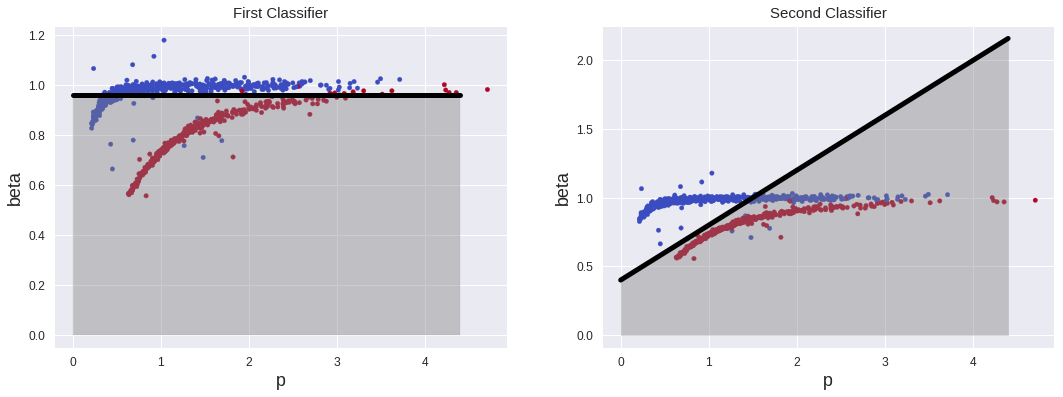

In [7]:
'''
Let's first see how the classes would look like.
'''
x_label = features[f_ind_1]
y_label = features[f_ind_2]

## First decision boundary
x1 = np.arange(0,4.5,.1)
y1 = .96*np.ones(len(np.arange(0,4.5,.1) ))

## First decision boundary
x2 = np.arange(0,4.5,.1)
y2 = .4*np.arange(0,4.5,.1) +.4


fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(121, xlabel = x_label, ylabel=y_label, title='First Classifier')
ax1.scatter(X[:,0],X[:,1], c= Y , cmap=plt.cm.coolwarm, s=20)
ax1.plot(x1 , y1, color='black')
ax1.fill_between(x1 ,0, y1 , color='gray', alpha=.4)

ax2 = fig.add_subplot(122, xlabel = x_label, ylabel=y_label, title='Second Classifier')
ax2.scatter(X[:,0],X[:,1], c= Y , cmap=plt.cm.coolwarm, s=20)
ax2.plot(x2 , y2, color='black')
ax2.fill_between(x2 ,0, y2 , color='gray', alpha=.4)

plt.show()

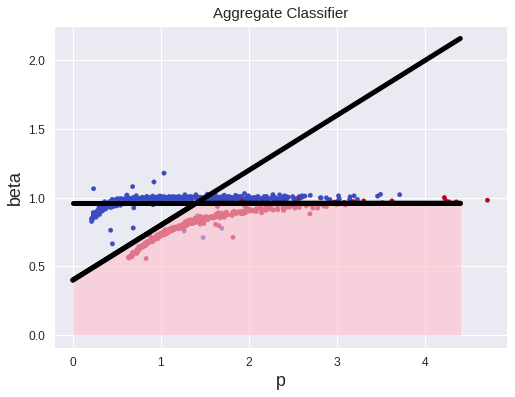

In [11]:
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(121, xlabel = x_label, ylabel=y_label, title='Aggregate Classifier')
ax1.scatter(X[:,0],X[:,1], c= Y , cmap=plt.cm.coolwarm, s=20)

ax1.plot(x1 , np.minimum(y1,y2), color='black')
# ax1.fill_between(x1 ,0, y1 , color='gray', alpha=.1)

ax1.plot(x2 , y1, color='black')
ax1.plot(x2 , y2, color='black')
ax1.fill_between(x2 ,0, y2 , color='gray', alpha=0)

ax1.fill_between(x2 ,0, np.minimum(y1,y2) , color='pink', alpha=.6)

plt.show()

In [0]:
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from mlxtend.classifier import StackingClassifier

In [0]:
# Create classifiers
knn = KNeighborsClassifier()
svc = SVC()
rgc = RidgeClassifier()
sgd = SGDClassifier()
lrc = LogisticRegression()

clf_dict = {'knn': knn, "svc":svc, 'lrc':lrc, 'sgd':sgd,'rgc':rgc}



In [14]:
for clf in clf_dict.keys():
  scores = cross_val_score(clf_dict[clf], X, Y, cv=5, scoring='accuracy')
  print('For {}, the accuracy is {}  +/- {}'.format(clf, scores.mean(), scores.std())  )

For knn, the accuracy is 0.9674125103334251  +/- 0.009604540168892827
For svc, the accuracy is 0.9663488564342794  +/- 0.023446280953232798
For lrc, the accuracy is 0.950592449710664  +/- 0.011739663630052518
For sgd, the accuracy is 0.8528575365114357  +/- 0.1071012080233794
For rgc, the accuracy is 0.9737227886470101  +/- 0.007388872997518569


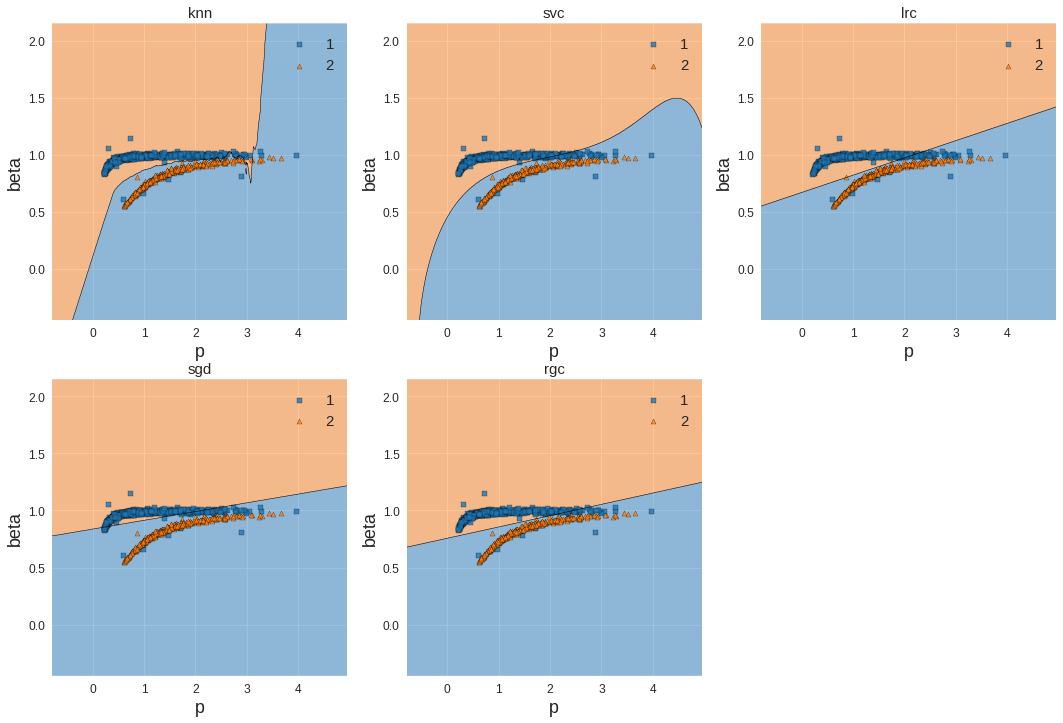

In [0]:
from mlxtend.plotting import plot_decision_regions
ind=0
fig = plt.figure(figsize=(18,12))

for clf_name in clf_dict:

    clf_dict[clf_name].fit(X, Y)
    
    ind +=1
    ax = plt.subplot(2,3, ind, xlabel = x_label, ylabel=y_label)
    plot_decision_regions(X=X, y=Y.values, clf=clf_dict[clf_name])
    plt.title(clf_name)

Stacking
====

In [16]:
stk_clf = StackingClassifier(classifiers=[knn, svc, lrc, rgc, sgd],  meta_classifier=rgc)

stk_scores = cross_val_score(stk_clf, X, Y, cv=5, scoring='accuracy')
print('For StackingClassifier, the accuracy is {}  +/- {}'.format( stk_scores.mean(), stk_scores.std())  )

For StackingClassifier, the accuracy is 0.9684651419123724  +/- 0.009366015126689367


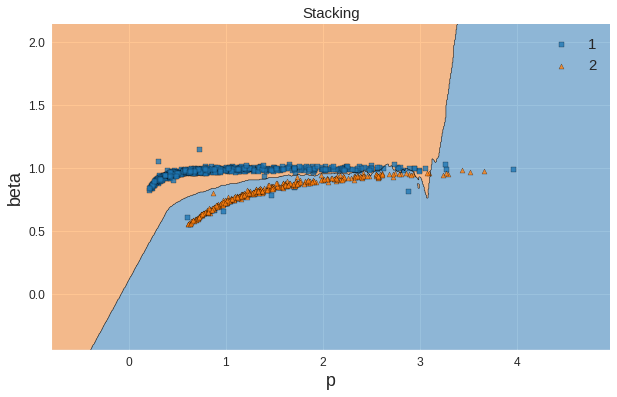

In [0]:
from mlxtend.plotting import plot_decision_regions
ind=0
stk_clf.fit(X,Y)
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(1,1, 1, xlabel = x_label, ylabel=y_label, title='Stacking')
plot_decision_regions(X=X, y=Y.values, clf=stk_clf)


plt.show()

Bagging
=====

In [19]:
## Bagging
bgc = BaggingClassifier(base_estimator=knn, n_estimators=200, max_samples=.4, max_features=1, bootstrap=True, bootstrap_features=False, n_jobs=-1)

bgc_scores = cross_val_score(bgc, X, Y, cv=5, scoring='accuracy')
print('For BaggingClassifier, the accuracy is {}  +/- {}'.format( bgc_scores.mean(), bgc_scores.std())  )

For BaggingClassifier, the accuracy is 0.9169137503444474  +/- 0.018107842207867982


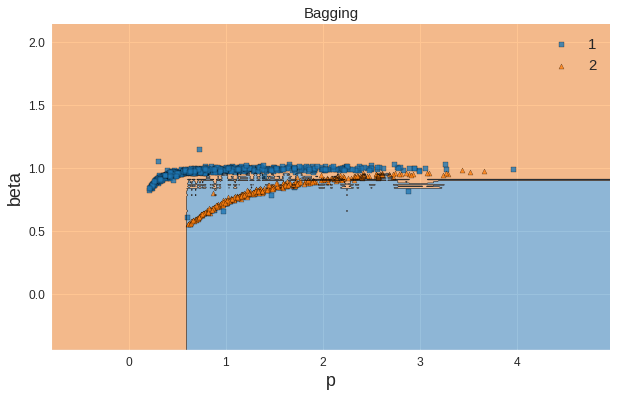

In [0]:
from mlxtend.plotting import plot_decision_regions
ind=0
bgc.fit(X,Y)
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(1,1, 1, xlabel = x_label, ylabel=y_label, title='Bagging')
plot_decision_regions(X=X, y=Y.values, clf=bgc)


plt.show()

In [20]:
rfc = RandomForestClassifier()

rfc_scores = cross_val_score(rfc, X, Y, cv=5, scoring='accuracy')
print('For Random Forest Classifier, the accuracy is {}  +/- {}'.format( rfc_scores.mean(), rfc_scores.std())  )

For Random Forest Classifier, the accuracy is 0.9884541195921741  +/- 0.010673197849540498


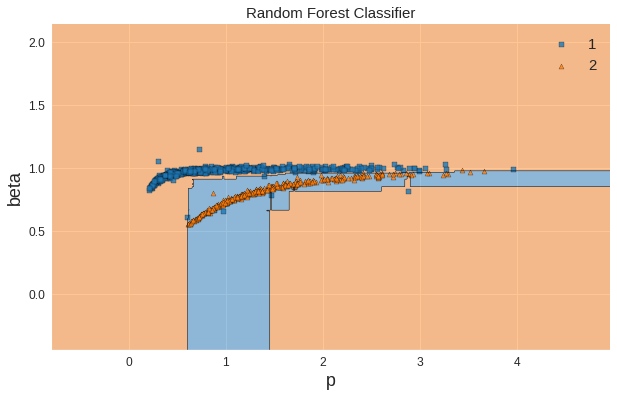

In [0]:
from mlxtend.plotting import plot_decision_regions

rfc.fit(X,Y)
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(1,1, 1, xlabel = x_label, ylabel=y_label, title='Random Forest Classifier')
plot_decision_regions(X=X, y=Y.values, clf=rfc)


plt.show()

Boosting
=====

In [0]:
## Boosting
ada_boost = AdaBoostClassifier()
abc_scores = cross_val_score(ada_boost, X, Y, cv=5, scoring='accuracy')
print('For AdaBoostClassifier, the accuracy is {}  +/- {}'.format( abc_scores.mean(), abc_scores.std())  )

grad_boost = GradientBoostingClassifier()
gbc_scores = cross_val_score(grad_boost, X, Y, cv=5, scoring='accuracy')
print('For GradientBoostingClassifier, the accuracy is {}  +/- {}'.format( gbc_scores.mean(), gbc_scores.std())  )

xgb_boost = XGBClassifier()
xgb_scores = cross_val_score(xgb_boost, X, Y, cv=5, scoring='accuracy')
print('For XGBClassifier, the accuracy is {}  +/- {}'.format( xgb_scores.mean(), xgb_scores.std())  )

For AdaBoostClassifier, the accuracy is 0.9882749962224306  +/- 0.0021166754223091045
For GradientBoostingClassifier, the accuracy is 0.9818862081690618  +/- 0.004227718120816179
For XGBClassifier, the accuracy is 0.9882806851517738  +/- 0.00520252988517664


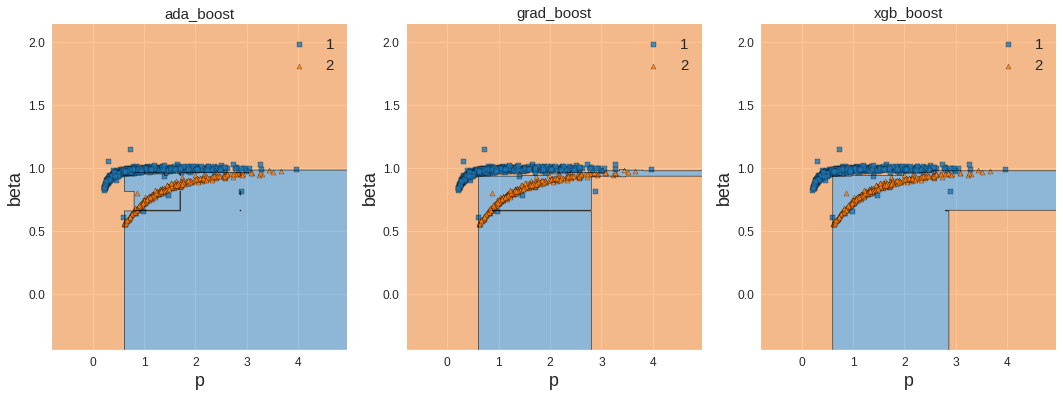

In [0]:
from mlxtend.plotting import plot_decision_regions
ind=0
fig = plt.figure(figsize=(18,6))

for clf, clf_name in zip([ada_boost, grad_boost, xgb_boost], 
                         ['ada_boost', 'grad_boost',   'xgb_boost']):

    clf.fit(X, Y)
    
    ind +=1
    ax = plt.subplot(1,3, ind, xlabel = x_label, ylabel=y_label)
    plot_decision_regions(X=X, y=Y.values, clf=clf)
    plt.title(clf_name)